In [24]:
import pandas  as pd
import numpy   as np
import xgboost as xgb
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import seaborn as sns

In [25]:
data = pd.read_csv("./data/diamondse.csv")
data = data.dropna().copy()

new = data["measurments"].str.split(" ", expand = True)
data[['x', 'y', 'z']] = new[[0, 2, 4]]
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

relavent_data = ['shape', 'carat', 'cut', 'color', 'clarity', 'width', 'depth', 'cert', 'x', 'y', 'z', 'price']
data = data[relavent_data]

data


,shape,carat,cut,color,clarity,width,depth,cert,x,y,z,price
0,Round,1.20,Ideal,H,VS2,58.0,62.3,GIA,6.72,6.76,4.20,8223.0
1,Round,2.03,Ideal,I,VS2,59.0,61.4,GIA,8.10,8.14,4.98,18600.0
2,Round,1.50,Ideal,J,SI2,58.0,62.7,GIA,7.24,7.29,4.56,7096.0
3,Round,0.50,V.Good,E,VS1,57.0,64.2,GIA,4.93,4.99,3.19,1483.0
4,Round,1.33,Ideal,G,VVS1,58.0,59.8,GIA,7.15,7.18,4.28,14019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
301797,Asscher,0.70,V.Good,E,VS2,66.0,68.4,GIA,4.87,4.78,3.27,1920.0
301798,Asscher,1.00,V.Good,E,VS2,66.0,68.3,GIA,5.48,5.40,3.69,4714.0
301799,Asscher,0.80,V.Good,E,VVS1,67.0,68.0,GIA,5.07,5.06,3.44,2979.0
301800,Asscher,6.03,Good,H,VVS2,70.0,69.2,GIA,9.82,9.67,6.70,120776.0


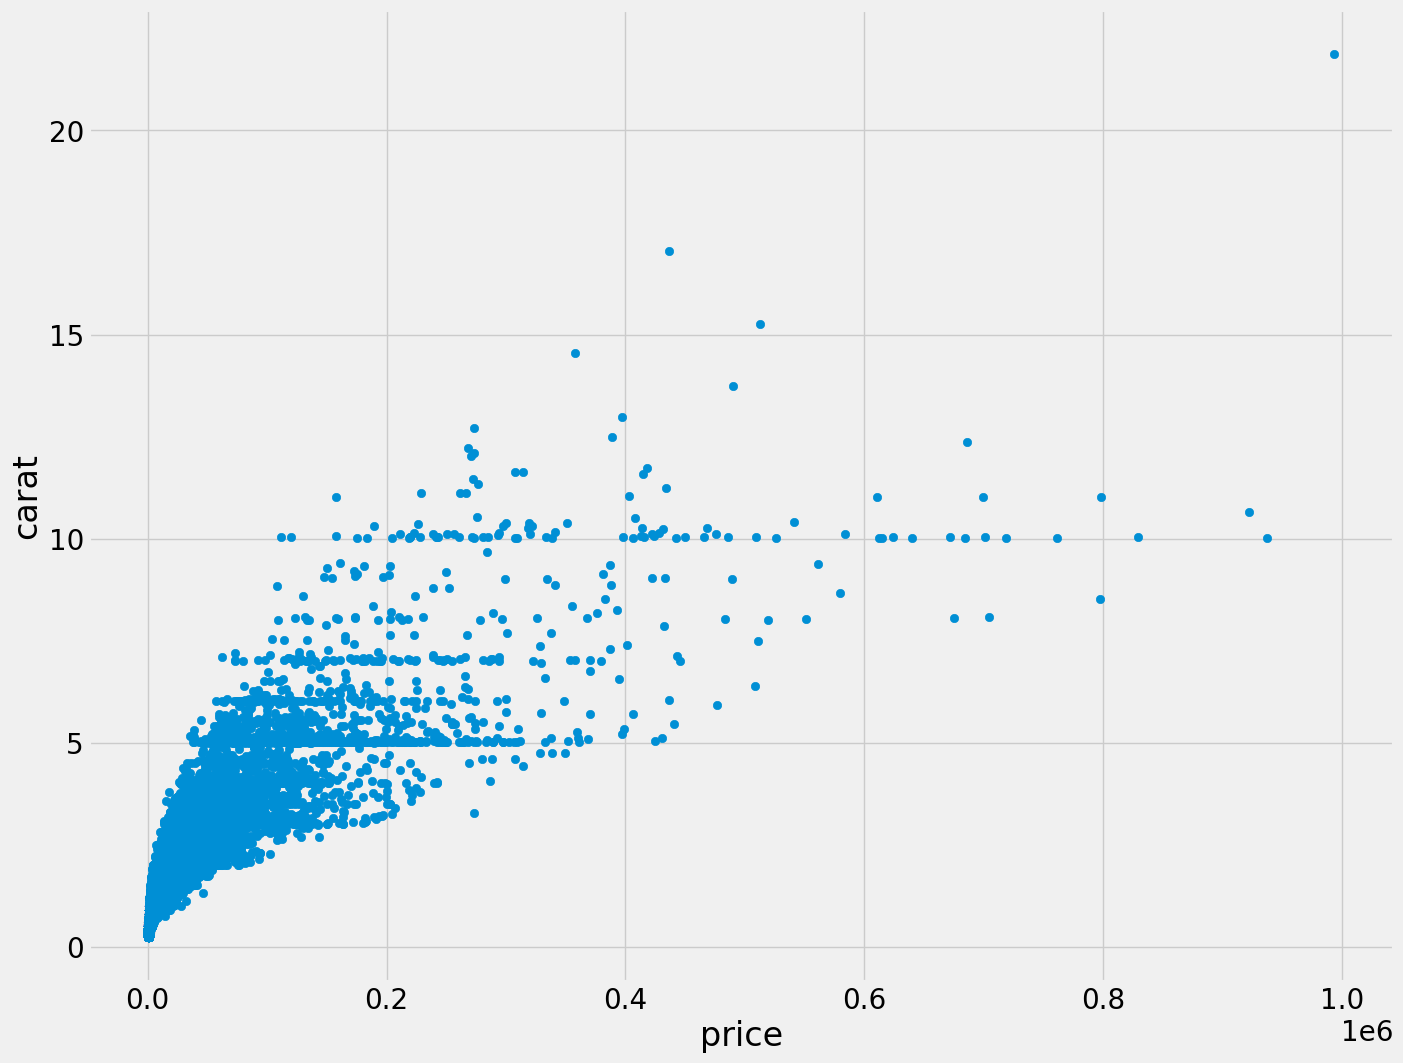

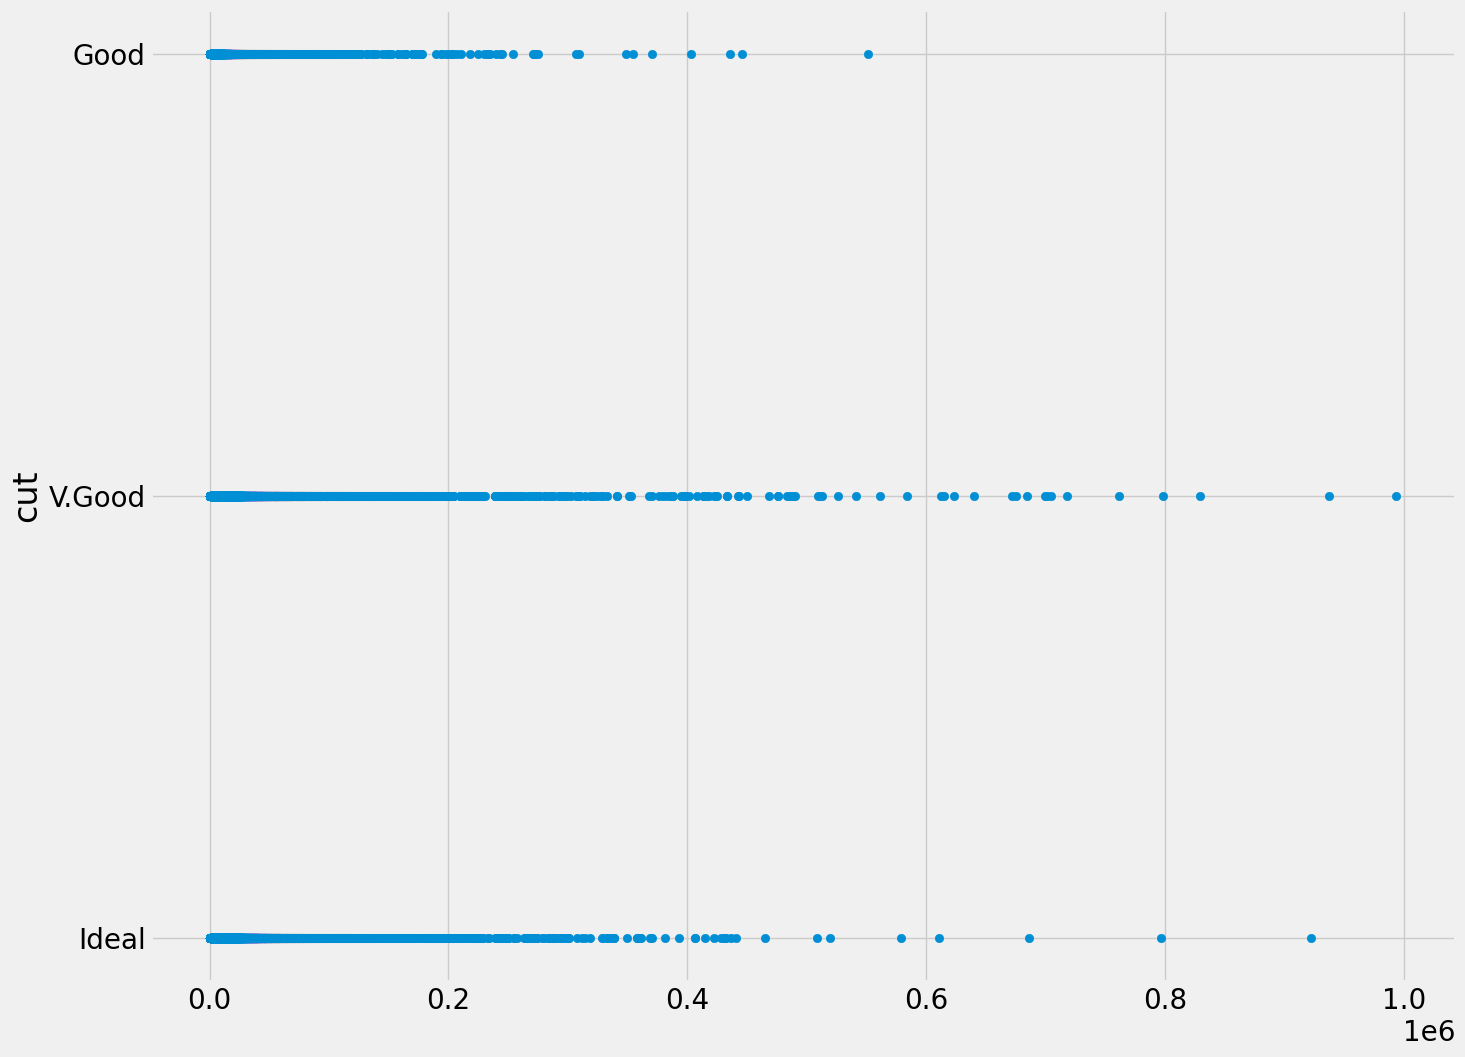

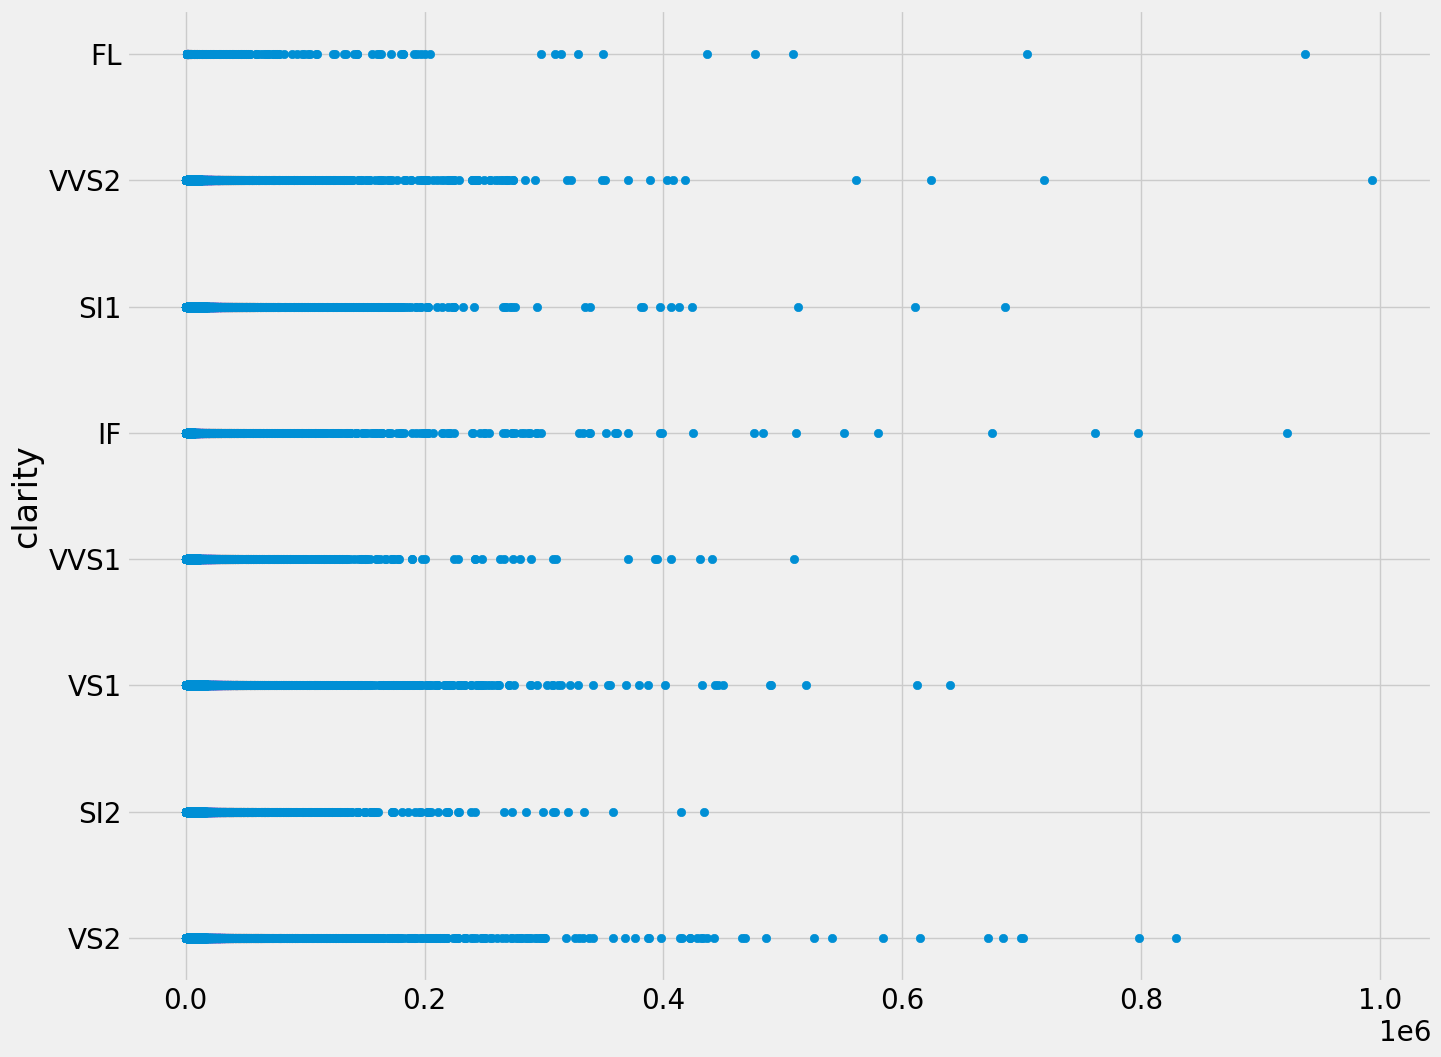

In [26]:
plt.rcParams['figure.figsize'] = [15, 12]

plt.xlabel('price')

plt.ylabel('carat')
plt.scatter(data['price'], data['carat'])
plt.show()

plt.ylabel('cut')
plt.scatter(data['price'], data['cut'])
plt.show() 

plt.ylabel('clarity')
plt.scatter(data['price'], data['clarity'])
plt.show() 


In [27]:
data['cert'].value_counts()

GIA    300738
AGS      1059
Name: cert, dtype: int64

In [28]:
data = data.loc[data['cert'] == "GIA"].copy()
del data['cert']

In [29]:
shape = {'Round': 11,
 'Cushion': 10,
 'Princess': 9,
 'Emerald': 8,
 'Oval': 7,
 'Pear': 6,
 'Marquise': 5,
 'Radiant': 4,
 'Heart': 3,
 'Asscher': 2,
 'CM': 1}

dict(data['shape'].value_counts())

{'Round': 197870,
 'Oval': 23567,
 'Cushion': 18115,
 'Princess': 17276,
 'Pear': 16834,
 'Radiant': 9497,
 'Marquise': 4860,
 'Heart': 4825,
 'Emerald': 4352,
 'Asscher': 3542}

In [30]:
cut = {'Excellent': 5,
 'V.Good': 4,
 'Good': 3,
 'Fair': 2,
 'Ideal': 5.5}

dict(data['cut'].value_counts())

{'Ideal': 154420, 'V.Good': 121979, 'Good': 24339}

In [31]:
clarity = {'VS2': 4,
 'VS1': 5,
 'SI1': 3,
 'VVS2': 6,
 'SI2': 2,
 'VVS1': 7,
 'IF': 8,
 'I1': 1,
 'FL': 9,
 'None': 0}

dict(data['clarity'].value_counts())

{'SI1': 63415,
 'SI2': 57970,
 'VS2': 50909,
 'VS1': 47098,
 'VVS2': 36629,
 'VVS1': 33410,
 'IF': 10970,
 'FL': 337}

In [32]:
color = {'D': 15,
 'E': 14,
 'F': 13,
 'G': 12,
 'H': 11,
 'I': 10,
 'J': 9,
 'K': 8,
 'L': 7,
 'M': 6,
 'N': 5,
 'YZ': 1,
 'WX': 2,
 'OP': 4,
 'UV': 3,
 'Y': 1.5}

dict(data['color'].value_counts())

{'G': 48251,
 'E': 45407,
 'F': 45087,
 'H': 43251,
 'D': 39365,
 'I': 38817,
 'J': 27394,
 'K': 12237,
 'L': 929}

In [33]:
data['cut'].replace(cut, inplace=True)

data['clarity'].replace(clarity, inplace=True)
data['color'].replace(color, inplace=True)

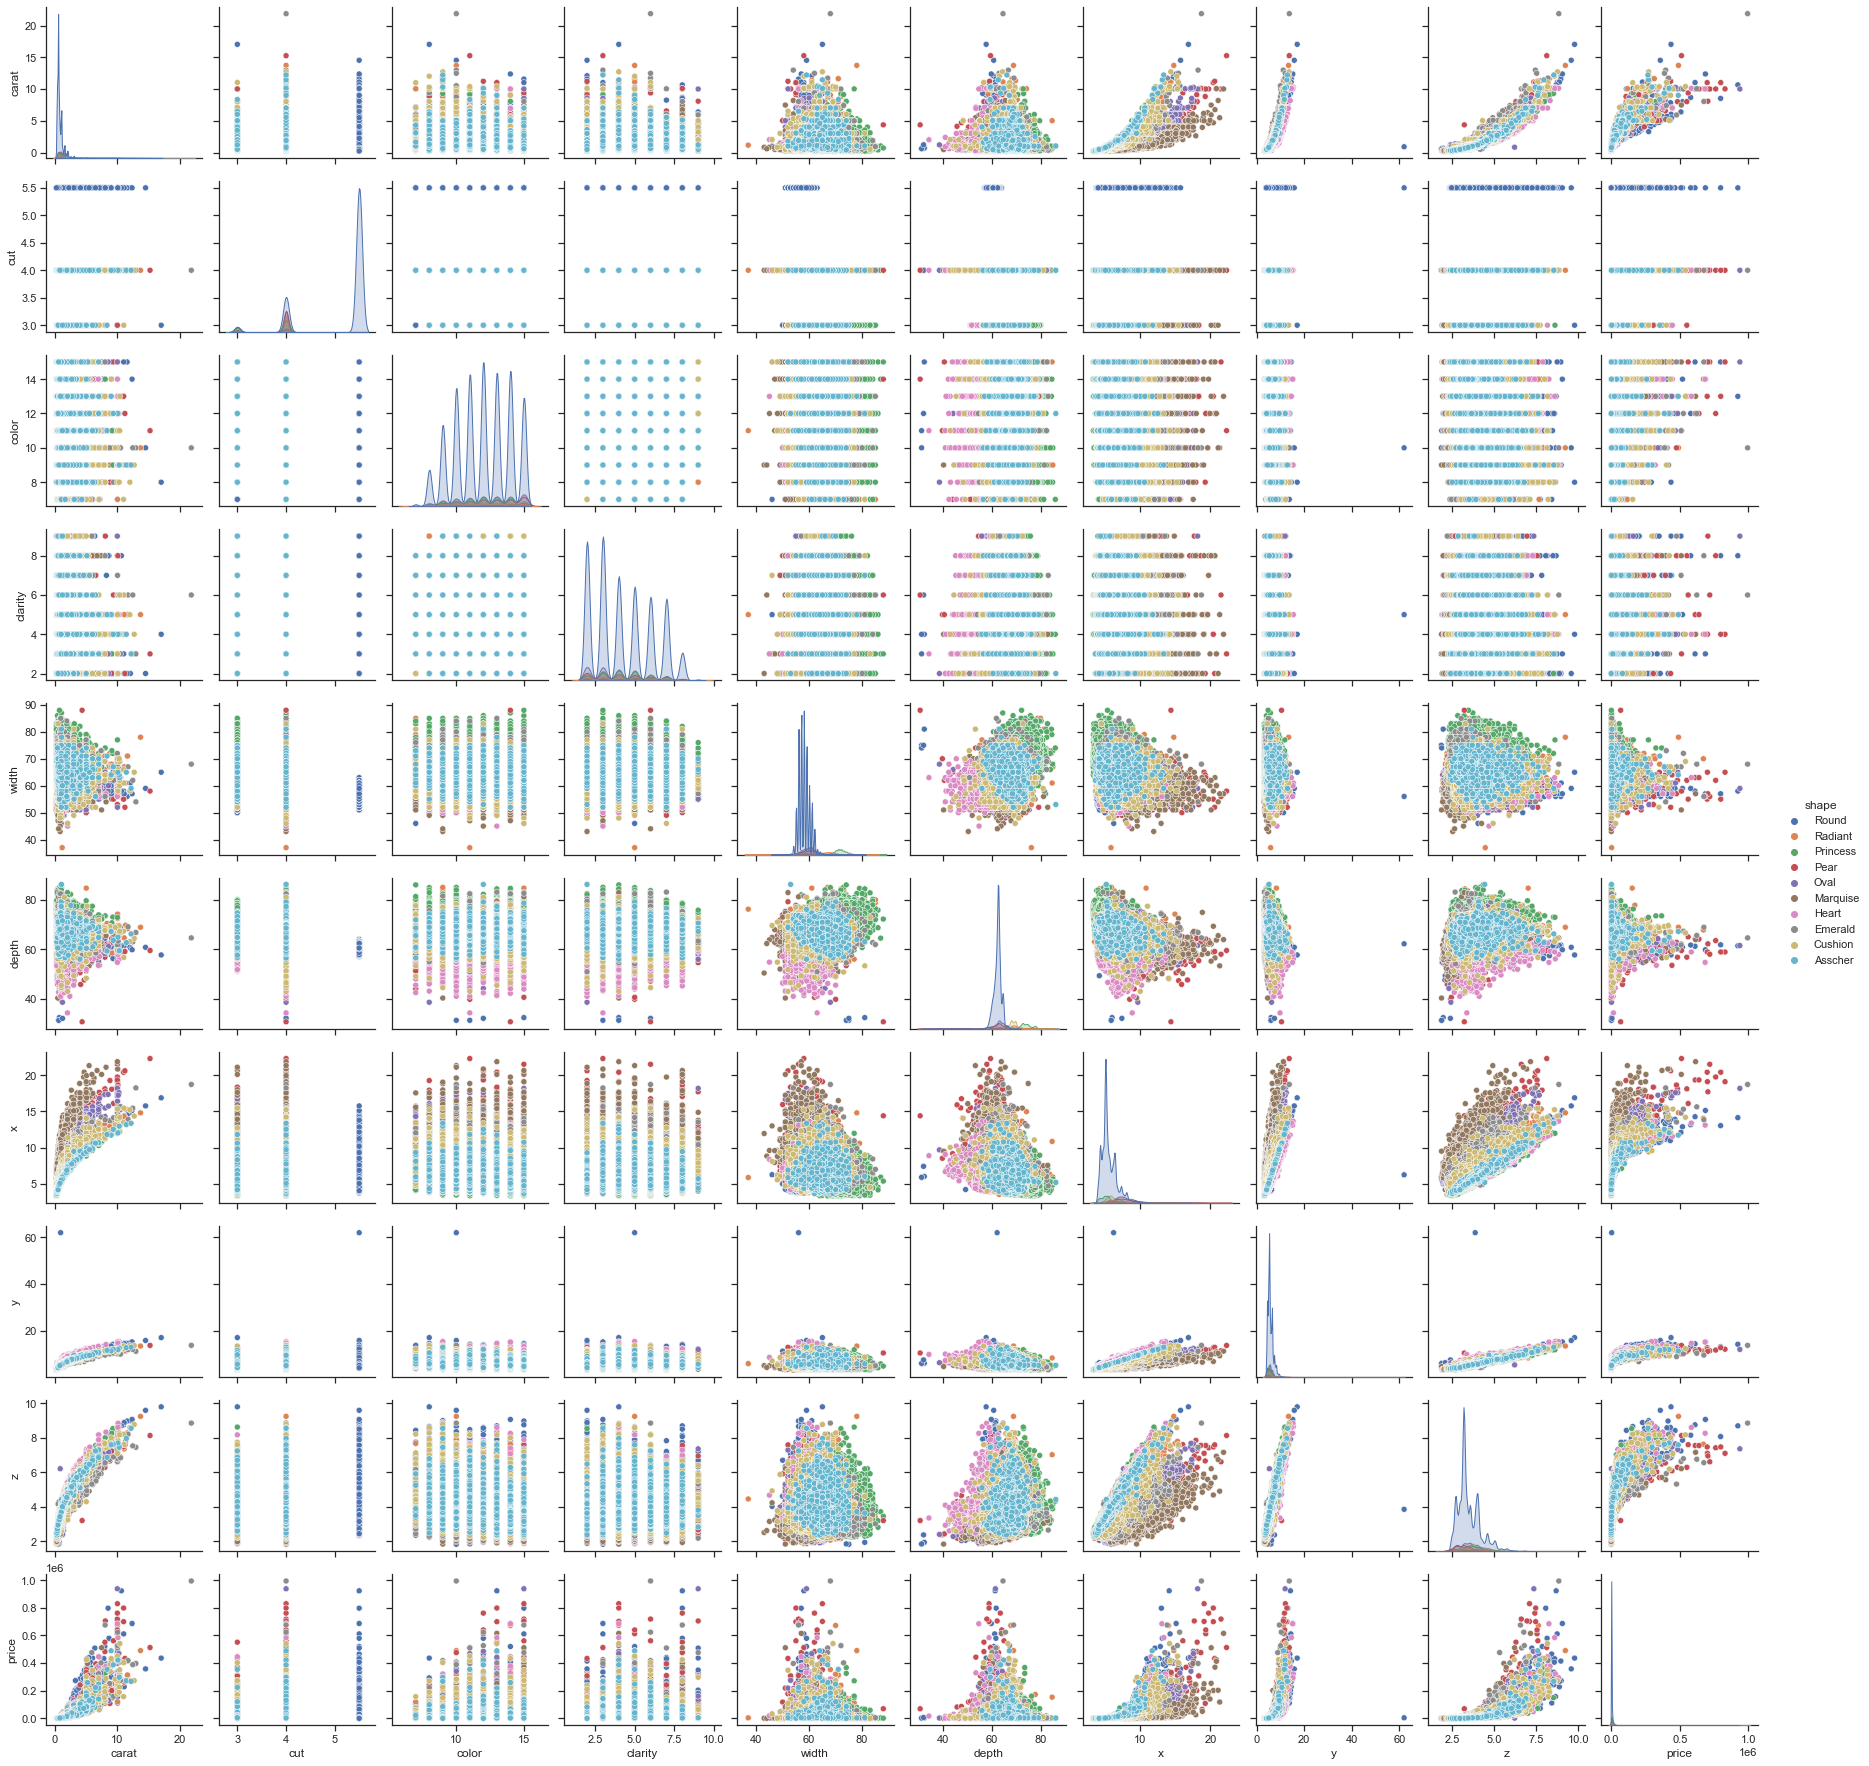

In [50]:
# plot scatter matrix using seaborn
sns.set_theme(style="ticks")
sns.pairplot(data, hue='shape')
plt.savefig('DiamondSE_data.png', dpi=600)

In [34]:
data['shape'].replace(shape, inplace=True)

# Predict Prices

In [35]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold, train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



In [36]:
#define predictor and response variables
X = data[['shape', 'carat', 'cut', 'color', 'clarity', 'width', 'depth', 'x', 'y', 'z']]
y = data[['price']]

# Linear Regression

In [40]:
#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0) 

linear = LinearRegression().fit(scale(X_train), y_train)
#linear = LinearRegression().fit(X_train, y_train) 

In [41]:
#calculate RMSE
pred = linear.predict(scale(X_test))
#pred = linear.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 9600.355227772592


# PCA Regression

In [25]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

Text(0.5, 1.0, 'Price')

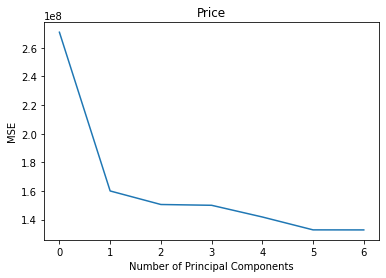

In [26]:
#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 7):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Price')

In [27]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 36.9 ,  59.52,  70.65,  80.52,  89.5 ,  94.27,  97.28,  99.04,
        99.95, 100.  ])

In [28]:
#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0) 

#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,0:5]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,0:5], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 12526.845952174768


# K-Nearest Neighbors Regression

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

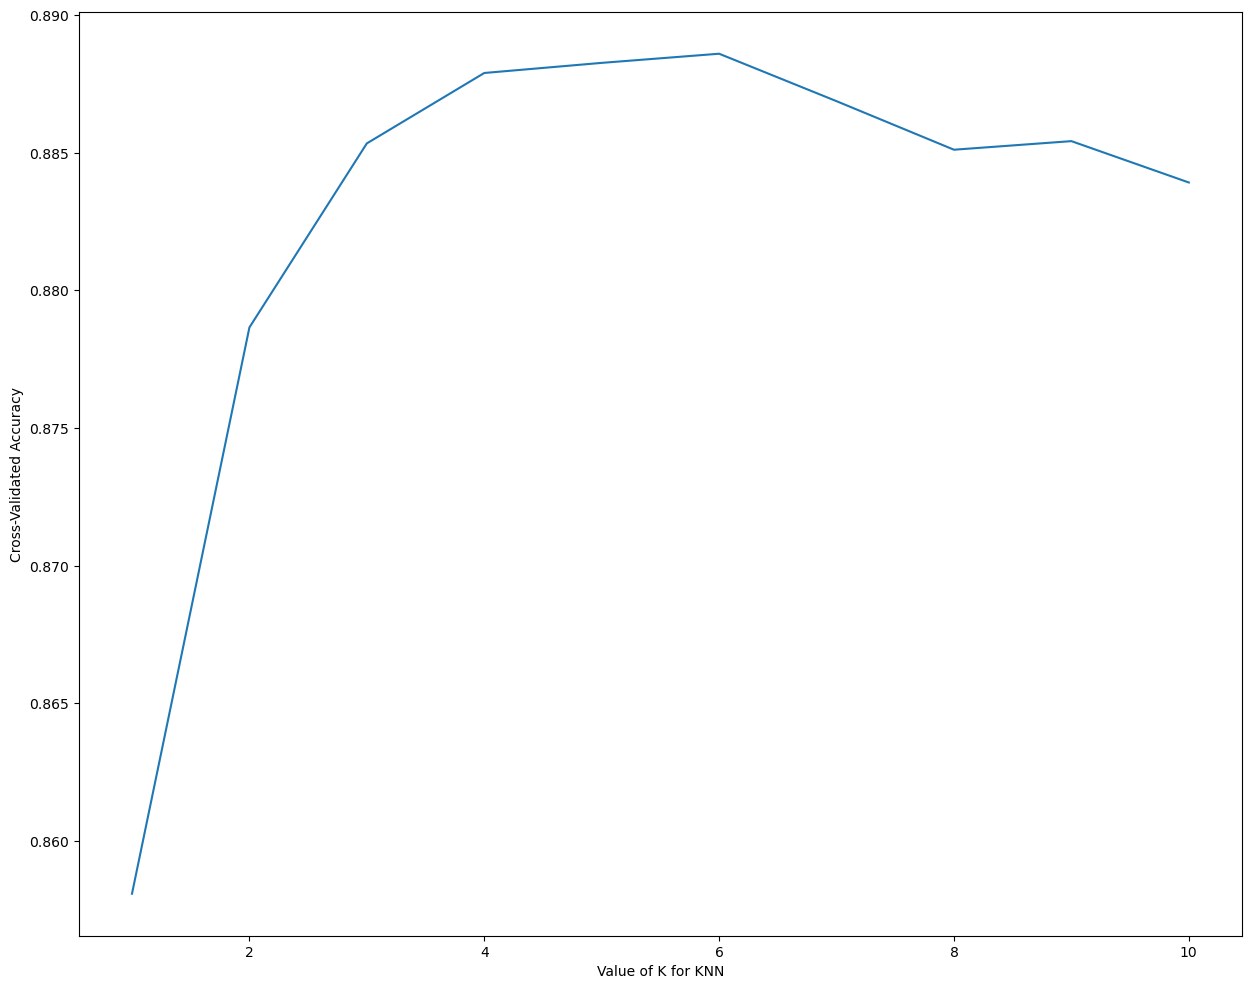

In [17]:
# choose k between 1 to 31
k_range = range(1, 11)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)
    k_scores.append(scores.mean())
    
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [43]:
#split the dataset into training (75%) and testing (25%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0) 


#train PCR model on training data 
knnr = KNeighborsRegressor(n_neighbors=6)
knnr.fit(X_train, y_train)

#calculate RMSE
pred = knnr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 5726.586051045268


# XGBoost Regression

In [37]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=0)

In [34]:
print(X_train_val.dtypes)


shape        int64
carat      float64
cut        float64
color        int64
clarity      int64
width      float64
depth      float64
x          float64
y          float64
z          float64
dtype: object


In [35]:
xgb1 = XGBRegressor()
parameters = {
              'objective':['reg:squarederror'],
              'learning_rate': [.0001, 0.001, .01],
              'max_depth': [3, 5, 7],
              'min_child_weight': [3,5,7],
              'subsample': [0.1,0.5,1.0],
              'colsample_bytree': [0.1, 0.5, 1.0],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = -1,
                        verbose=0)

xgb_grid.fit(X_train, y_train)

xgb_cv = (xgb_grid.best_estimator_)

eval_set = [(X_train, y_train),
            (X_val, y_val)]

xgb = xgb_cv.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    eval_metric='mae',
    early_stopping_rounds=50,
    verbose=False)

print("MAE:", mean_absolute_error(y_val, xgb.predict(X_val)))
print("MSE:", mean_squared_error(y_val, xgb.predict(X_val)))
print("R2:", r2_score(y_val, xgb.predict(X_val)))

C:\Users\Chintu\AppData\Local\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Chintu\AppData\Local\anaconda3\envs\ml\Lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE: 720.4953454293701
MSE: 7666729.209140971
R2: 0.9655942659948666


In [36]:
best_params = xgb_grid.best_params_
print("Best Params for XGBoost Regressor: ", xgb_grid.best_params_)

Best Params for XGBoost Regressor:  {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}


In [38]:
best_params = {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.5}

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0) 

xgbr = XGBRegressor(learning_rate = best_params["learning_rate"],
                           n_estimators  = best_params["n_estimators"],
                           max_depth     = best_params["max_depth"],
                           objective = best_params["objective"],
                           colsample_bytree = best_params["colsample_bytree"],
                           subsample = best_params["subsample"],
                           min_child_weight = best_params["min_child_weight"],
                           eval_metric='rmse')

xgbr.fit(X_train, y_train)

#calculate RMSE
pred = xgbr.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred))) # / len(y_test)

RMSE: 3234.402588014773


# XGBoost Regression Feature Importance

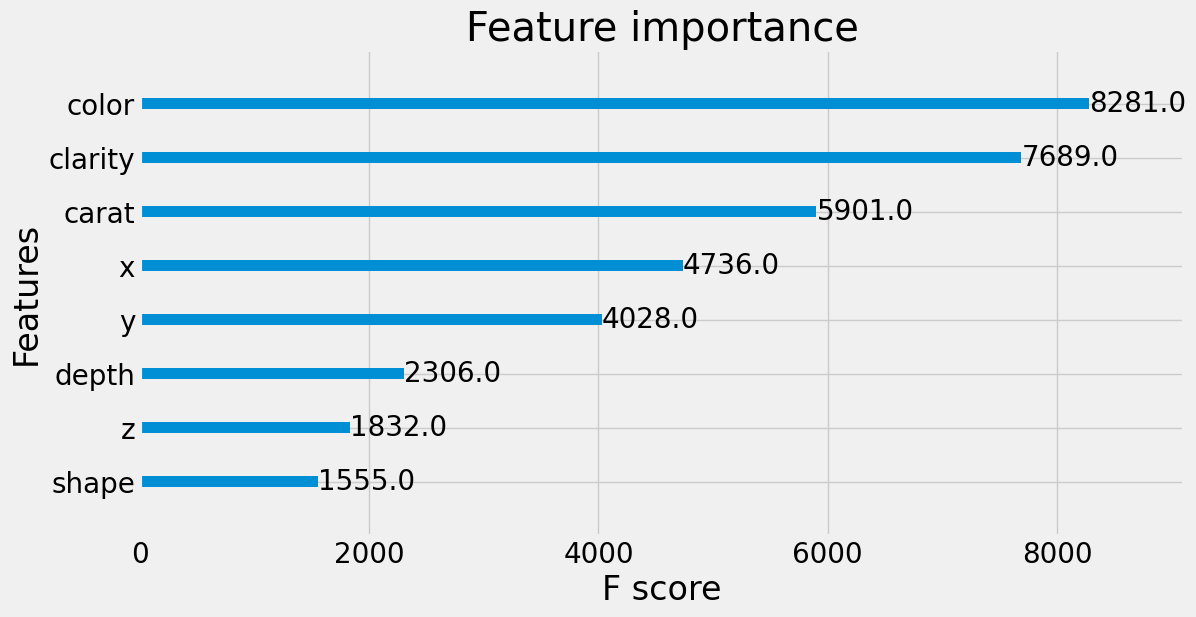

<Figure size 1500x1200 with 0 Axes>

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 20})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(xgbr, max_num_features=8, ax=ax)
plt.show();
plt.savefig('xgbr_feature_DiamondSE.png')

# Save Model

In [44]:
import pickle
with open('linear_DiamondSE.pkl', 'wb') as f:
    pickle.dump(linear, f)
with open('knnr_DiamondSE.pkl', 'wb') as f:
    pickle.dump(knnr, f)

xgbr.save_model('xgbr_DiamondSE.json')